In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [3]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Show a crosstab (or pivot) of order_status vs payment_method with counts, then visualize it as a stacked bar chart (100% stacked to see proportions).

In [ ]:
df_pivot=df.groupby(['order_status','payment_method']).agg(order_count=('order_id','count')).reset_index()

df_pivot.pivot_table(index='order_status',columns='payment_method',values='order_count')

# or
df.pivot_table(index='order_status',columns='payment_method',
            values='order_id',aggfunc='count')

# or
pd.crosstab(
    index=df.order_status,
    columns=df.payment_method
)

payment_method,Cash on Delivery,Credit Card,Debit Card,EMI,Net Banking,UPI,Wallet
order_status,,,,,,,
Cancelled,6.0,9.0,2.0,6.0,12.0,2.0,3.0
Delivered,90.0,216.0,105.0,97.0,158.0,81.0,74.0
Processing,2.0,6.0,2.0,2.0,8.0,3.0,2.0
Returned,NaN,5.0,2.0,1.0,5.0,NaN,6.0
Shipped,13.0,28.0,7.0,14.0,14.0,12.0,7.0


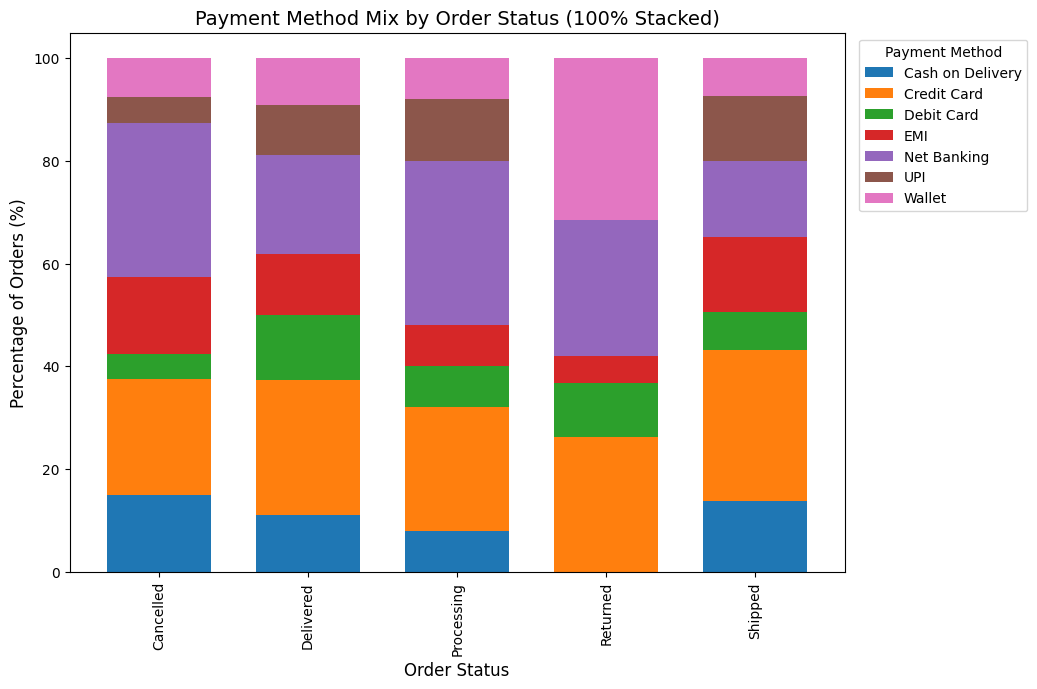

In [43]:
ct_pct=pd.crosstab(
    index=df.order_status,
    columns=df.payment_method,
    normalize='index'
)*100

ct_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7),
    width=0.7
)
plt.legend(
    title='Payment Method',
    bbox_to_anchor=(1.01,1),
    loc='upper left'
)
plt.title('Payment Method Mix by Order Status (100% Stacked)', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Percentage of Orders (%)', fontsize=12)

plt.show()